# PreliminaryPerformanceAnalysis

Here, I assess the behavior of a settings management tool for Tesseract, with the major constraint that the ground truth -- correctly transcribed texts -- is unavailable.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# The capture command is used here to minimize visual clutter.
%%capture
!sudo apt-get install tesseract-ocr-all
!pip3 install pytesseract
!pip install langdetect
!pip install PyMuPDF

In [4]:
%cd /content/drive/MyDrive/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr/
from tesseract_manager import Text

/content/drive/.shortcut-targets-by-id/1W2EROe2FItlaK99U-WY_qaBOc2UD_LI0/AWCA/Colab_notebooks/OCR/pDonovan/awca-ocr


In [31]:
import pickle
import matplotlib.pyplot as plt
import statistics
import pandas as pd

## Iteration 0

Here, I characterize the zeroth tested iteration of the system.

The qualitative analysis, which was more informative and important, can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1-Pao75iP8Kbb-DsW-uKg1BcN0PFCr8HR7qK3FK2LXPk/edit?usp=sharing) -- especially the "Notes" and "Solved by" columns.

In [5]:
with open('development_sample_out/analysis.pickle', 'rb') as dbfile:
  it0 = pickle.load(dbfile)
it0

In [38]:
mean_confidences = list(
    conf for conf in it0.mean_confidences if not pd.isna(conf))
print('The mean wordwise confidence was {:.4f},\nthe mean pagewise confidence '
  'was {:.4f},\nand {} pages were analyzed with a confidence of less than '
  '75.'.format(
      statistics.mean(
          confidence
          for data in [data for data in it0.metadata if data is not None]
          for confidence in data.conf if confidence > -1
      ),
      statistics.mean(mean_confidences),
      sum(conf < 75 for conf in mean_confidences)
  ))

The mean wordwise confidence was 87.3667,
the mean pagewise confidence was 85.1585,
and 32 pages were analyzed with a confidence of less than 75.


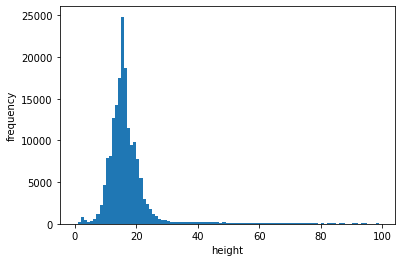

In [10]:
all_heights = [
           height
           for data in [data for data in it0.metadata if data is not None]
           for height in data.height
]
plt.hist(all_heights, bins=list(range(100)))
plt.xlabel('height')
plt.ylabel('frequency');

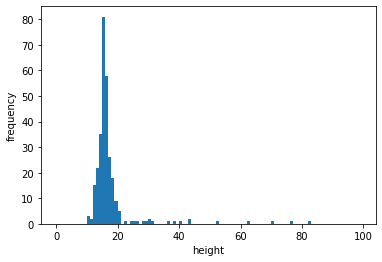

In [11]:
median_heights = [
           data.height.median()
           for data in [data for data in it0.metadata if data is not None]
]
plt.hist(median_heights, bins=list(range(100)))
plt.xlabel('height')
plt.ylabel('frequency');

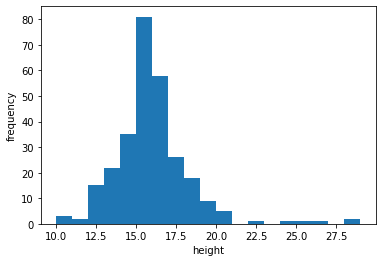

In [12]:
plt.hist(median_heights, bins=list(range(10, 30)))
plt.xlabel('height')
plt.ylabel('frequency');

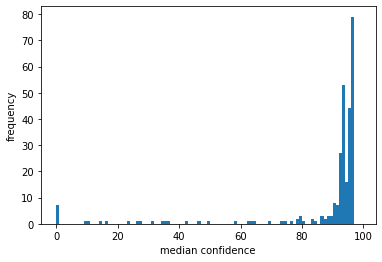

In [13]:
median_confidences = [
           data.conf.median()
           for data in [data for data in it0.metadata if data is not None]
]
plt.hist(median_confidences, bins=list(range(100)))
plt.xlabel('median confidence')
plt.ylabel('frequency');

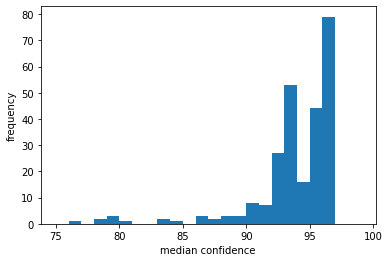

In [14]:
plt.hist(median_confidences, bins=list(range(75, 100)))
plt.xlabel('median confidence')
plt.ylabel('frequency');

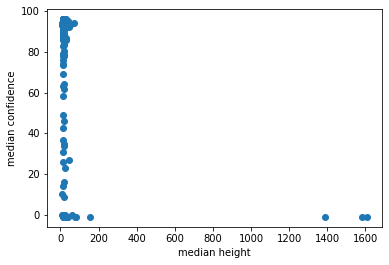

In [16]:
plt.scatter(median_heights, median_confidences)
plt.xlabel('median height')
plt.ylabel('median confidence');

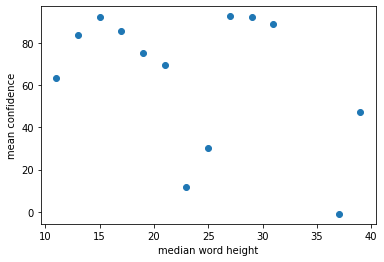

In [20]:
movmeans = []
bins = []
for lower in list(range(10, 40, 2)):
  bin = [median_confidences[i] for i, height in enumerate(median_heights) if lower <= height <= lower+2]
  if bin:
    movmeans.append(sum(bin) / len(bin))
    bins.append(lower+1)
plt.scatter(bins, movmeans)
plt.ylabel('mean confidence')
plt.xlabel('median word height');

The above is worth comparing with [this result](https://groups.google.com/g/tesseract-ocr/c/Wdh_JJwnw94/m/24JHDYQbBQAJ).

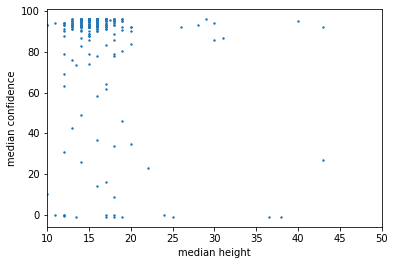

In [18]:
plt.scatter(median_heights, median_confidences, s=2)
plt.xlabel('median height')
plt.ylabel('median confidence')
plt.xlim(10, 50);

The above indicates that it seems not uncommon that texts outside of the apparently optimal range are sometimes analyzed with high confidence.

# Iteration 1

In iteration 0, I found that a mostly correct result was sometimes being replaced by a completely incorrect result by the OSD-assisted analysis -- typically because the detected script or orientation was wrong. Here, I amend that by ensuring that results with moderate confidences are not replaced by results with lower confidences.

In [36]:
with open('development_sample_out3/analysis.pickle', 'rb') as dbfile:
  it1 = pickle.load(dbfile)
it1

In [39]:
mean_confidences = list(
    conf for conf in it1.mean_confidences if not pd.isna(conf))
print('The mean wordwise confidence was {:.4f},\nthe mean pagewise confidence '
  'was {:.4f},\nand {} pages were analyzed with a confidence of less than '
  '75.'.format(
      statistics.mean(
          confidence
          for data in [data for data in it1.metadata if data is not None]
          for confidence in data.conf if confidence > -1
      ),
      statistics.mean(mean_confidences),
      sum(conf < 75 for conf in mean_confidences)
  ))

The mean wordwise confidence was 88.3453,
the mean pagewise confidence was 86.2748,
and 31 pages were analyzed with a confidence of less than 75.


This shows that there was a small improvement.

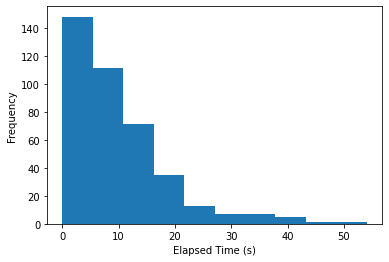

In [43]:
times = [it1.times[i] - it1.times[i-1] for i in range(1, len(it1.times))]
plt.hist(times)
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Frequency');

In [44]:
statistics.mean(times)

9.366165890131978

## Iteration 2

Here, I arrange for the system to choose an empirically optimal image scale.

In [45]:
with open('development_sample_out4/analysis.pickle', 'rb') as dbfile:
  it2 = pickle.load(dbfile)
it2

In [46]:
mean_confidences = list(
    conf for conf in it2.mean_confidences if not pd.isna(conf))
print('The mean wordwise confidence was {:.4f},\nthe mean pagewise confidence '
  'was {:.4f},\nand {} pages were analyzed with a confidence of less than '
  '75.'.format(
      statistics.mean(
          confidence
          for data in [data for data in it2.metadata if data is not None]
          for confidence in data.conf if confidence > -1
      ),
      statistics.mean(mean_confidences),
      sum(conf < 75 for conf in mean_confidences)
  ))

The mean wordwise confidence was 89.0195,
the mean pagewise confidence was 87.9094,
and 17 pages were analyzed with a confidence of less than 75.


Confidence scores increased, and there was a marked decrease in the number of pages that were analyzed with very low confidence. 17 pages out of 400 is only 4.25%.

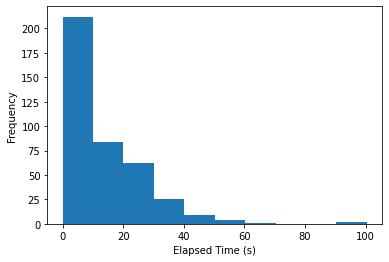

In [47]:
times = [it2.times[i] - it2.times[i-1] for i in range(1, len(it2.times))]
plt.hist(times)
plt.xlabel('Elapsed Time (s)')
plt.ylabel('Frequency');

In [48]:
statistics.mean(times)

12.974709617762937

However, the mean time to analyze a text has increased. I would for like it to be closer to 9 seconds per page.

For transparency, I should note that 9 seconds per page is about the time it takes for Tesseract to analyze a page without any of the tricks I have been using to try to improve accuracy. The number, 9 seconds, was chosen because I want to be more accurate than the vanilla usage of Tesseract without being slower.